In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Reset if needed below
# warnings.filterwarnings("default")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', '{:.2f}'.format)

from matplotlib.ticker import ScalarFormatter

In [2]:
clean = pd.read_csv('ppp_clean.csv')
clean.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67,0,0
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 SOUTHRAIL ROAD,NORTH CHARLESTON,UNKNOWN/NOTSTATED,29420,2021-09-28,PAID IN FULL,24,100,736927.79,736927.79,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,NORTH CHARLESTON,CHARLESTON,SC,29420,SC-06,73.00,561730.00,WHITE,UNKNOWN/NOTSTATED,0.00,736927.79,0.00,0.00,0.00,0.00,0.00,SOLE PROPRIETORSHIP,19248,SYNOVUS BANK,COLUMBUS,GA,MALE OWNED,NON-VETERAN,N,746336.24,2021-08-12,0,1,0,0,0,0,0,Landscaping Services,43.94,1,-9408.45,0.00,0.00,10094.90,10094.90,0.00,10094.90,0.00,0.00,0.00,0.00,0.00,10223.78,0,0
2,5791407702,2020-05-01,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,UNKNOWN/NOTSTATED,98112,2021-03-17,PAID IN FULL,24,100,691355.00,691355.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SEATTLE,KING,WA,98112,WA-07,75.00,0.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,691355.00,0.00,0.00,0.00,0.00,0.00,NON-PROFIT ORGANIZATION,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION",CHARLOTTE,NC,UNANSWERED,UNANSWERED,Y,696677.49,2021-02-10,0,1,0,0,0,0,0,UNKNOWN/NOTSTATED,51.29,1,-5322.49,0.00,0.00,9218.07,9218.07,0.00,9218.07,0.00,0.00,0.00,0.00,0.00,9289.03,0,0
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,UNKNOWN/NOTSTATED,92407,2021-10-16,PAID IN FULL,24,100,499871.00,499871.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SAN BERNARDINO,SAN BERNARDINO,CA,92407,CA-23,21.00,236115.00,AMERICAN INDIAN OR ALASKA NATIVE,NOT HISPANIC OR LATINO,0.00,499871.00,0.00,0.00,0.00,0.00,0.00,CORPORATION,9551,"BANK OF AMERICA, NATIONAL

In [3]:
clean.isnull().sum()

LoanNumber                                0
DateApproved                              0
SBAOfficeCode                             0
ProcessingMethod                          0
BorrowerName                              0
BorrowerAddress                           0
BorrowerCity                              0
BorrowerState                             0
BorrowerZip                               0
LoanStatusDate                            0
LoanStatus                                0
Term                                      0
SBAGuarantyPercentage                     0
InitialApprovalAmount                     0
CurrentApprovalAmount                     0
UndisbursedAmount                         0
FranchiseName                             0
ServicingLenderLocationID                 0
ServicingLenderName                       0
ServicingLenderAddress                    0
ServicingLenderCity                       0
ServicingLenderState                      0
ServicingLenderZip              

Columns we have introduced so far:
   
   Proceed purpose (binary)
   - UTILITIES_PROCEED_purpose
   - PAYROLL_PROCEED_purpose
   - MORTGAGE_INTEREST_PROCEED_purpose
   - RENT_PROCEED_purpose
   - REFINANCE_EIDL_PROCEED_purpose
   - HEALTH_CARE_PROCEED_purpose
   - DEBT_INTEREST_PROCEED_purpose
   
   NAICS data:
   - NAICS Industry Description	
   - Size standards in number of employees
   
   Loan data:
   - Forgiven (binary)
   - non_forgiven_loan_portion
   - ApprovalDifference
   - ApprovalDifference_per_employee
   - InitialApprovalAmount_per_employee
   - CurrentApprovalAmount_per_employee
   
   - UTILITIES_PROCEED_per_employee
   - PAYROLL_PROCEED_per_employee
   - MORTGAGE_INTEREST_PROCEED_per_employee
   - RENT_PROCEED_per_employee
   - REFINANCE_EIDL_PROCEED_per_employee
   - HEALTH_CARE_PROCEED_per_employee
   - DEBT_INTEREST_PROCEED_per_employee
   
   - ForgivenessAmount_per_employee
   
   Application history data:
   - Prior PPP count	
   - Prior PPS count
   
 Columns to create:
   - expected_UTILITIES_PROCEED_per_employee
   - expected_PAYROLL_PROCEED_per_employee
   - expected_MORTGAGE_INTEREST_PROCEED_per_employee
   - expected_RENT_PROCEED_per_employee
   - expected_REFINANCE_EIDL_PROCEED_per_employee
   - expected_HEALTH_CARE_PROCEED_per_employee
   - expected_DEBT_INTEREST_PROCEED_per_employee
   
   
   - deviant_JR
   
   
   - deviant_UTILITIES_PROCEED_per_employee
   - deviant_PAYROLL_PROCEED_per_employee
   - deviant_MORTGAGE_INTEREST_PROCEED_per_employee
   - deviant_RENT_PROCEED_per_employee
   - deviant_REFINANCE_EIDL_PROCEED_per_employee
   - deviant_HEALTH_CARE_PROCEED_per_employee
   - deviant_DEBT_INTEREST_PROCEED_per_employee
   
   
   - expected_ApprovalDifference_per_employee
   - expected_InitialApprovalAmount_per_employee
   - expected_CurrentApprovalAmount_per_employee
   - expected_ForgivenessAmount_per_employee
   
   
   - deviant_ApprovalDifference_per_employee
   - deviant_InitialApprovalAmount_per_employee
   - deviant_CurrentApprovalAmount_per_employee
   - deviant_ForgivenessAmount_per_employee
   
 Where 'expected','per_employee' features will take the original feature e.g., 'Utilities Proceed', and divide that feature by the 'Size standards in number of employees' for the registered NAICS industry for each loan;
 
 and 'deviant', 'per_employee' features will take the difference between expected and actual features in order to create the following percentile ranked risk scores features:
 
 Proceed risk scores:
 - deviant_UP_risk_score
 - deviant_PP_risk_score
 - deviant_MIP_risk_score 
 - deviant_RP_risk_score
 - deviant_EIDL_risk_score
 - deviant_HCP_risk_score
 - deviant_DIP_risk_score
 
 Loan Data risk scores:
 - deviant_AD_risk_score
 - deviant_IAA_risk_score
 - deviant_CAA_risk_score
 - deviant_FA_risk_score
 
 We will then calculate the total average risk score by taking the simple average of all risk scores.

In [4]:
# List of column names for which we want to calculate expected_employee values
columns_to_expect = ['UTILITIES_PROCEED',
                        'PAYROLL_PROCEED',
                        'MORTGAGE_INTEREST_PROCEED',
                        'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED',
                        'HEALTH_CARE_PROCEED',
                        'DEBT_INTEREST_PROCEED',
                        'ForgivenessAmount',
                        'ApprovalDifference',
                        'InitialApprovalAmount',
                        'CurrentApprovalAmount']

# Loop through the columns and calculate per-employee values
for column in columns_to_expect:
    new_column_name = 'expected_' + column
    clean[new_column_name] = clean[column] / clean['Size standards in number of employees']

clean.head(2)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count,expected_UTILITIES_PROCEED,expected_PAYROLL_PROCEED,expected_MORTGAGE_INTEREST_PROCEED,expected_RENT_PROCEED,expected_REFINANCE_EIDL_PROCEED,expected_HEALTH_CARE_PROCEED,expected_DEBT_INTEREST_PROCEED,expected_ForgivenessAmount,expected_ApprovalDifference,expected_InitialApprovalAmount,expected_CurrentApprovalAmount
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67,0,0,0.00,769.36,0.00,0.00,0.00,0.00,0.00,773.55,0.00,769.36,769.36
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 SOUTHRAIL ROAD,NORTH CHARLESTON,UNKNOWN/NOTSTATED,29420,2021-09-28,PAID IN FULL,24,100,736927.79,736927.79,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,NORTH CHARLESTON,CHARLESTON,SC,29420,SC-06,73.00,561730.00,WHITE,UNKNOWN/NOTSTATED,0.00,736927.79,0.00,0.00,0.00,0.00,0.00,SOLE PROPRIETORSHIP,19248,SYNOVUS BANK,COLUMBUS,GA,MALE OWNED,NON-VETERAN,N,746336.24,2021-08-12,0,1,0,0,0,0,0,Landscaping Services,43.94,1,-9408.45,0.00,0.00,10094.90,10094.90,0.00,10094.90,0.00,0.00,0.00,0.00,0.00,10223.78,0,0,0.00,16771.11,0.00,0.00,0.00,0.00,0.00,16985.23,0.00,16771.11,16771.11


In [5]:
clean.isnull().sum()

LoanNumber                                0
DateApproved                              0
SBAOfficeCode                             0
ProcessingMethod                          0
BorrowerName                              0
BorrowerAddress                           0
BorrowerCity                              0
BorrowerState                             0
BorrowerZip                               0
LoanStatusDate                            0
LoanStatus                                0
Term                                      0
SBAGuarantyPercentage                     0
InitialApprovalAmount                     0
CurrentApprovalAmount                     0
UndisbursedAmount                         0
FranchiseName                             0
ServicingLenderLocationID                 0
ServicingLenderName                       0
ServicingLenderAddress                    0
ServicingLenderCity                       0
ServicingLenderState                      0
ServicingLenderZip              

In [6]:
# Create deviant jobs feature
clean['deviant_JR'] = np.abs(clean['JobsReported'] - clean['Size standards in number of employees']) / clean['Size standards in number of employees']

# calculate the percentile rank of each observation in the 'Deviant Jobs Reported' column
clean['deviant_JR_risk_score'] = clean['deviant_JR'].rank(pct=True, method='min')

clean.head(2)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count,expected_UTILITIES_PROCEED,expected_PAYROLL_PROCEED,expected_MORTGAGE_INTEREST_PROCEED,expected_RENT_PROCEED,expected_REFINANCE_EIDL_PROCEED,expected_HEALTH_CARE_PROCEED,expected_DEBT_INTEREST_PROCEED,expected_ForgivenessAmount,expected_ApprovalDifference,expected_InitialApprovalAmount,expected_CurrentApprovalAmount,deviant_JR,deviant_JR_risk_score
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67,0,0,0.00,769.36,0.00,0.00,0.00,0.00,0.00,773.55,0.00,769.36,769.36,0.94,0.83
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 SOUTHRAIL ROAD,NORTH CHARLESTON,UNKNOWN/NOTSTATED,29420,2021-09-28,PAID IN FULL,24,100,736927.79,736927.79,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,NORTH CHARLESTON,CHARLESTON,SC,29420,SC-06,73.00,561730.00,WHITE,UNKNOWN/NOTSTATED,0.00,736927.79,0.00,0.00,0.00,0.00,0.00,SOLE PROPRIETORSHIP,19248,SYNOVUS BANK,COLUMBUS,GA,MALE OWNED,NON-VETERAN,N,746336.24,2021-08-12,0,1,0,0,0,0,0,Landscaping Services,43.94,1,-9408.45,0.00,0.00,10094.90,10094.90,0.00,10094.90,0.00,0.00,0.00,0.00,0.00,10223.78,0,0,0.00,16771.11,0.00,0.00,0.00,0.00,0.00,16985.23,0.00,16771.11,16771.11,0.66,0.59


In [7]:
clean.isnull().sum()

LoanNumber                                0
DateApproved                              0
SBAOfficeCode                             0
ProcessingMethod                          0
BorrowerName                              0
BorrowerAddress                           0
BorrowerCity                              0
BorrowerState                             0
BorrowerZip                               0
LoanStatusDate                            0
LoanStatus                                0
Term                                      0
SBAGuarantyPercentage                     0
InitialApprovalAmount                     0
CurrentApprovalAmount                     0
UndisbursedAmount                         0
FranchiseName                             0
ServicingLenderLocationID                 0
ServicingLenderName                       0
ServicingLenderAddress                    0
ServicingLenderCity                       0
ServicingLenderState                      0
ServicingLenderZip              

In [8]:
# List of column names for which we want to calculate deviant values
expected = ['expected_UTILITIES_PROCEED',
            'expected_PAYROLL_PROCEED',
            'expected_MORTGAGE_INTEREST_PROCEED',
            'expected_RENT_PROCEED',
            'expected_REFINANCE_EIDL_PROCEED',
            'expected_HEALTH_CARE_PROCEED',
            'expected_DEBT_INTEREST_PROCEED',
            'expected_ForgivenessAmount',
            'expected_ApprovalDifference',
            'expected_InitialApprovalAmount',
            'expected_CurrentApprovalAmount']

actual = ['UTILITIES_PROCEED',
          'PAYROLL_PROCEED',
          'MORTGAGE_INTEREST_PROCEED',
          'RENT_PROCEED',
          'REFINANCE_EIDL_PROCEED',
          'HEALTH_CARE_PROCEED',
          'DEBT_INTEREST_PROCEED',
          'ForgivenessAmount',
          'ApprovalDifference',
          'InitialApprovalAmount',
          'CurrentApprovalAmount']

# Loop through the columns and calculate per-employee values
for i in range(len(expected)):
    exp = expected[i]
    act = actual[i]
    new_column_name = 'deviant_' + act
    clean[new_column_name] = (clean[act] - clean[exp]) / clean[exp]
    clean[new_column_name].fillna(0, inplace=True)


clean.head(2)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count,expected_UTILITIES_PROCEED,expected_PAYROLL_PROCEED,expected_MORTGAGE_INTEREST_PROCEED,expected_RENT_PROCEED,expected_REFINANCE_EIDL_PROCEED,expected_HEALTH_CARE_PROCEED,expected_DEBT_INTEREST_PROCEED,expected_ForgivenessAmount,expected_ApprovalDifference,expected_InitialApprovalAmount,expected_CurrentApprovalAmount,deviant_JR,deviant_JR_risk_score,deviant_UTILITIES_PROCEED,deviant_PAYROLL_PROCEED,deviant_MORTGAGE_INTEREST_PROCEED,deviant_RENT_PROCEED,deviant_REFINANCE_EIDL_PROCEED,deviant_HEALTH_CARE_PROCEED,deviant_DEBT_INTEREST_PROCEED,deviant_ForgivenessAmount,deviant_ApprovalDifference,deviant_InitialApprovalAmount,deviant_CurrentApprovalAmount
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67,0,0,0.00,769.36,0.00,0.00,0.00,0.00,0.00,773.55,0.00,769.36,769.36,0.94,0.83,0.00,999.00,0.00,0.00,0.00,0.00,0.00,999.00,0.00,999.00,999.00
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 SOUTHRAIL ROAD,NORTH CHARLESTON,UNKNOWN/NOTSTATED,29420,2021-09-28,PAID IN FULL,24,100,736927.79,736927.79,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,NORTH CHARLESTON,CHARLESTON,SC,29420,SC-06,73.00,561730.00,WHITE,UNKNOWN/NOTSTATED,0.00,736927.79,0.00,0.00,0.00,0.00,0.00,SOLE PROPRIETORSHIP,19248,SYNOVUS BANK,COLUMBUS,GA,MALE OWNED,NON-VETERAN,N,746336.24,2021-08-12,0,1,0,0,0,0,0,Landscaping Services,43.94,1,-9408.45,0.00,0.00,10094.90,10094.90,0.00,10094.90,0.00,0.00,0.00,0.00,0.00,10223.78,0,0,0.00,16771.11,0.00,0.00,0.00,0.00,0.00,16985.23,0.00,16771.11,16771.11,0.66,0.59,0.00,42.94,0.00,0.00,0.00,0.00,0.00,42.94,0.00,42.94,42.94


In [9]:
clean.isnull().sum()

LoanNumber                                0
DateApproved                              0
SBAOfficeCode                             0
ProcessingMethod                          0
BorrowerName                              0
BorrowerAddress                           0
BorrowerCity                              0
BorrowerState                             0
BorrowerZip                               0
LoanStatusDate                            0
LoanStatus                                0
Term                                      0
SBAGuarantyPercentage                     0
InitialApprovalAmount                     0
CurrentApprovalAmount                     0
UndisbursedAmount                         0
FranchiseName                             0
ServicingLenderLocationID                 0
ServicingLenderName                       0
ServicingLenderAddress                    0
ServicingLenderCity                       0
ServicingLenderState                      0
ServicingLenderZip              

In [10]:
# calcuate deviant risk scores
deviant_columns = ['deviant_UTILITIES_PROCEED',
            'deviant_PAYROLL_PROCEED',
            'deviant_MORTGAGE_INTEREST_PROCEED',
            'deviant_RENT_PROCEED',
            'deviant_REFINANCE_EIDL_PROCEED',
            'deviant_HEALTH_CARE_PROCEED',
            'deviant_DEBT_INTEREST_PROCEED',
            'deviant_ForgivenessAmount',
            'deviant_ApprovalDifference',
            'deviant_InitialApprovalAmount',
            'deviant_CurrentApprovalAmount']


# Loop through the columns and calculate deviant risk scores
for column in deviant_columns:
    new_column_name = column + '_risk_score'
    clean[new_column_name] = clean[column].rank(pct=True, method='min')

clean.head(2)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count,expected_UTILITIES_PROCEED,expected_PAYROLL_PROCEED,expected_MORTGAGE_INTEREST_PROCEED,expected_RENT_PROCEED,expected_REFINANCE_EIDL_PROCEED,expected_HEALTH_CARE_PROCEED,expected_DEBT_INTEREST_PROCEED,expected_ForgivenessAmount,expected_ApprovalDifference,expected_InitialApprovalAmount,expected_CurrentApprovalAmount,deviant_JR,deviant_JR_risk_score,deviant_UTILITIES_PROCEED,deviant_PAYROLL_PROCEED,deviant_MORTGAGE_INTEREST_PROCEED,deviant_RENT_PROCEED,deviant_REFINANCE_EIDL_PROCEED,deviant_HEALTH_CARE_PROCEED,deviant_DEBT_INTEREST_PROCEED,deviant_ForgivenessAmount,deviant_ApprovalDifference,deviant_InitialApprovalAmount,deviant_CurrentApprovalAmount,deviant_UTILITIES_PROCEED_risk_score,deviant_PAYROLL_PROCEED_risk_score,deviant_MORTGAGE_INTEREST_PROCEED_risk_score,deviant_RENT_PROCEED_risk_score,deviant_REFINANCE_EIDL_PROCEED_risk_score,deviant_HEALTH_CARE_PROCEED_risk_score,deviant_DEBT_INTEREST_PROCEED_risk_score,deviant_ForgivenessAmount_risk_score,deviant_ApprovalDifference_risk_score,deviant_InitialApprovalAmount_risk_score,deviant_CurrentApprovalAmount_risk_score
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67,0,0,0.00,769.36,0.00,0.00,0.00,0.00,0.00,773.55,0.00,769.36,769.36,0.94,0.83,0.00,999.00,0.00,0.00,0.00,0.00,0.00,999.00,0.00,999.00,999.00,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.97,0.00,0.96,0.96
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 SOUTHRAIL ROAD,NORTH CHARLESTON,UNKNOWN/NOTSTATED,29420,2021-09-28,PAID IN FULL,24,100,736927.79,736927.79,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,NORTH CHARLESTON,CHARLESTON,SC,29420,SC-06,73.00,561730.00,WHITE,UNKNOWN/NOTSTATED,0.00,736927.79,0.00,0.00,0.00,0.00,0.00,SOLE PROPRIETORSHIP,19248,SYNOVUS BANK,COLUMBUS,GA,MALE OWNED,NON-VETERAN,N,746336.24,2021-08-12,0,1,0,0,0,0,0,Landscaping Services,43.94,1

In [11]:
# evaluate mean, median, and distribution of some risk scores

clean['deviant_CurrentApprovalAmount_risk_score'].median()

0.49742427129766187

In [12]:
clean['deviant_UTILITIES_PROCEED_risk_score'].mean()

0.28322851875569677

<AxesSubplot:>

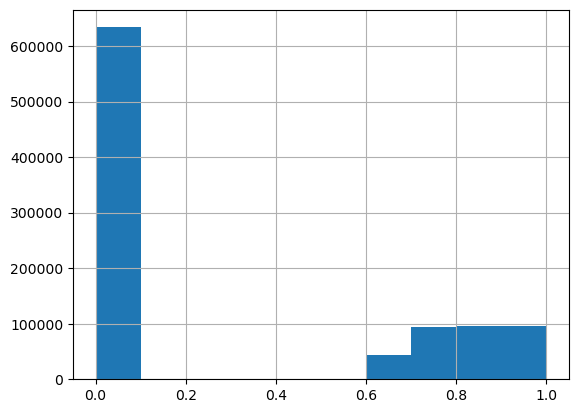

In [13]:
clean['deviant_UTILITIES_PROCEED_risk_score'].hist()

<AxesSubplot:>

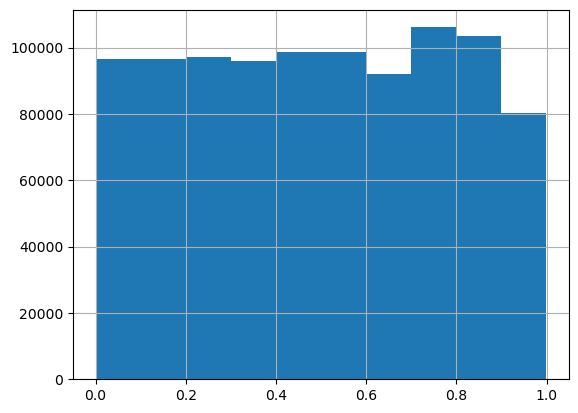

In [14]:
clean['deviant_CurrentApprovalAmount_risk_score'].hist()

In [15]:
# Calculate Average Risk Score
clean['average_risk_score'] = clean[['deviant_UTILITIES_PROCEED_risk_score',
            'deviant_PAYROLL_PROCEED_risk_score',
            'deviant_MORTGAGE_INTEREST_PROCEED_risk_score',
            'deviant_RENT_PROCEED_risk_score',
            'deviant_REFINANCE_EIDL_PROCEED_risk_score',
            'deviant_HEALTH_CARE_PROCEED_risk_score',
            'deviant_DEBT_INTEREST_PROCEED_risk_score',
            'deviant_ForgivenessAmount_risk_score',
            'deviant_ApprovalDifference_risk_score',
            'deviant_InitialApprovalAmount_risk_score',
            'deviant_CurrentApprovalAmount_risk_score']].mean(axis=1)

clean.head(1)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count,expected_UTILITIES_PROCEED,expected_PAYROLL_PROCEED,expected_MORTGAGE_INTEREST_PROCEED,expected_RENT_PROCEED,expected_REFINANCE_EIDL_PROCEED,expected_HEALTH_CARE_PROCEED,expected_DEBT_INTEREST_PROCEED,expected_ForgivenessAmount,expected_ApprovalDifference,expected_InitialApprovalAmount,expected_CurrentApprovalAmount,deviant_JR,deviant_JR_risk_score,deviant_UTILITIES_PROCEED,deviant_PAYROLL_PROCEED,deviant_MORTGAGE_INTEREST_PROCEED,deviant_RENT_PROCEED,deviant_REFINANCE_EIDL_PROCEED,deviant_HEALTH_CARE_PROCEED,deviant_DEBT_INTEREST_PROCEED,deviant_ForgivenessAmount,deviant_ApprovalDifference,deviant_InitialApprovalAmount,deviant_CurrentApprovalAmount,deviant_UTILITIES_PROCEED_risk_score,deviant_PAYROLL_PROCEED_risk_score,deviant_MORTGAGE_INTEREST_PROCEED_risk_score,deviant_RENT_PROCEED_risk_score,deviant_REFINANCE_EIDL_PROCEED_risk_score,deviant_HEALTH_CARE_PROCEED_risk_score,deviant_DEBT_INTEREST_PROCEED_risk_score,deviant_ForgivenessAmount_risk_score,deviant_ApprovalDifference_risk_score,deviant_InitialApprovalAmount_risk_score,deviant_CurrentApprovalAmount_risk_score,average_risk_score
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67,0,0,0.00,769.36,0.00,0.00,0.00,0.00,0.00,773.55,0.00,769.36,769.36,0.94,0.83,0.00,999.00,0.00,0.00,0.00,0.00,0.00,999.00,0.00,999.00,999.00,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.97,0.00,0.96,0.96,0.35


In [16]:
clean['average_risk_score'].median()

0.22950253985661712

In [17]:
clean['average_risk_score'].mean()

0.22828936644234799

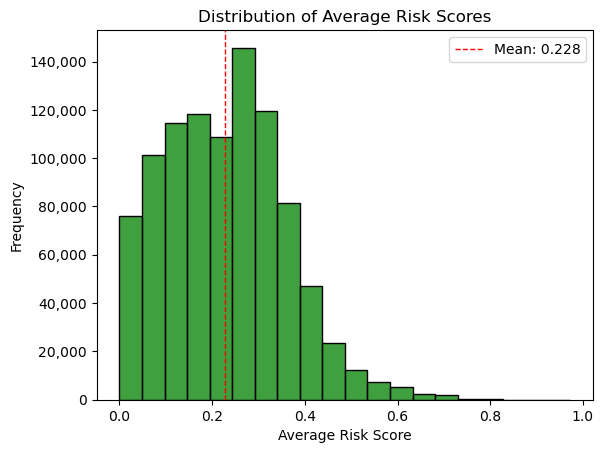

In [18]:
# Plotting the histogram using Seaborn with a different color (green)
sns.histplot(clean['average_risk_score'], bins=20, color='green')  # Adjust the number of bins as needed

# Formatting y-axis labels with commas for thousands separator
formatter = mtick.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Setting titles and labels
plt.title('Distribution of Average Risk Scores')
plt.xlabel('Average Risk Score')
plt.ylabel('Frequency')

# Show mean line
mean_score = clean['average_risk_score'].mean()
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_score:.3f}')
plt.legend()

# Save the plot as a PNG file named "ppp_avr_hist.png"
plt.savefig('ppp_avr_hist.png', dpi=300, bbox_inches='tight')

plt.show()

We have a right skew distribution for average risk score for all loans, indicating that most loans had a low risk score centered close to a risk score of 0.2. Some loans observed much higher risk scores over 0.5 which would be a cause for concern.

In [28]:
anomaly_inputs = ['ProcessingMethod','LoanStatus','Term',
                  'InitialApprovalAmount','CurrentApprovalAmount','ForgivenessAmount',
                  
                  'RuralUrbanIndicator','HubzoneIndicator','LMIIndicator','BusinessAgeDescription',
                  'CD','JobsReported','NonProfit','BusinessType','NAICS Industry Description','Size standards in number of employees',
                  
                  'UTILITIES_PROCEED','PAYROLL_PROCEED','MORTGAGE_INTEREST_PROCEED','RENT_PROCEED','REFINANCE_EIDL_PROCEED',
                  'HEALTH_CARE_PROCEED','DEBT_INTEREST_PROCEED',
                  
                  'non_forgiven_loan_portion','ApprovalDifference',
                  'ApprovalDifference_per_employee','InitialApprovalAmount_per_employee','CurrentApprovalAmount_per_employee',
                  'UTILITIES_PROCEED_per_employee','PAYROLL_PROCEED_per_employee','MORTGAGE_INTEREST_PROCEED_per_employee',
                  'RENT_PROCEED_per_employee','REFINANCE_EIDL_PROCEED_per_employee','HEALTH_CARE_PROCEED_per_employee',
                  'DEBT_INTEREST_PROCEED_per_employee','ForgivenessAmount_per_employee',
                  
                  'BorrowerCity','BorrowerState',
                  'ServicingLenderCity','ServicingLenderState','ServicingLenderLocationID',
                  'ProjectCity','ProjectState',
                  'OriginatingLenderLocationID','OriginatingLender','OriginatingLenderCity','OriginatingLenderState',
                  
                  'deviant_JR','deviant_UTILITIES_PROCEED','deviant_PAYROLL_PROCEED','deviant_MORTGAGE_INTEREST_PROCEED',
                  'deviant_RENT_PROCEED','deviant_REFINANCE_EIDL_PROCEED','deviant_HEALTH_CARE_PROCEED',
                  'deviant_DEBT_INTEREST_PROCEED','deviant_ForgivenessAmount','deviant_ApprovalDifference',
                  'deviant_InitialApprovalAmount','deviant_CurrentApprovalAmount']        

In [29]:
correlations = clean[anomaly_inputs].corrwith(clean['average_risk_score'])

# Sort the correlations to identify feature importance
correlations = correlations.sort_values(ascending=False)

print(correlations)

deviant_ForgivenessAmount                 0.50
deviant_InitialApprovalAmount             0.49
deviant_CurrentApprovalAmount             0.49
Size standards in number of employees     0.49
deviant_PAYROLL_PROCEED                   0.49
deviant_UTILITIES_PROCEED                 0.45
deviant_RENT_PROCEED                      0.34
deviant_HEALTH_CARE_PROCEED               0.29
deviant_DEBT_INTEREST_PROCEED             0.21
deviant_MORTGAGE_INTEREST_PROCEED         0.19
JobsReported                              0.18
RENT_PROCEED                              0.18
deviant_ApprovalDifference                0.16
HEALTH_CARE_PROCEED                       0.16
RENT_PROCEED_per_employee                 0.16
HEALTH_CARE_PROCEED_per_employee          0.14
DEBT_INTEREST_PROCEED_per_employee        0.10
DEBT_INTEREST_PROCEED                     0.10
UTILITIES_PROCEED                         0.10
ForgivenessAmount                         0.09
InitialApprovalAmount                     0.09
CurrentApprov

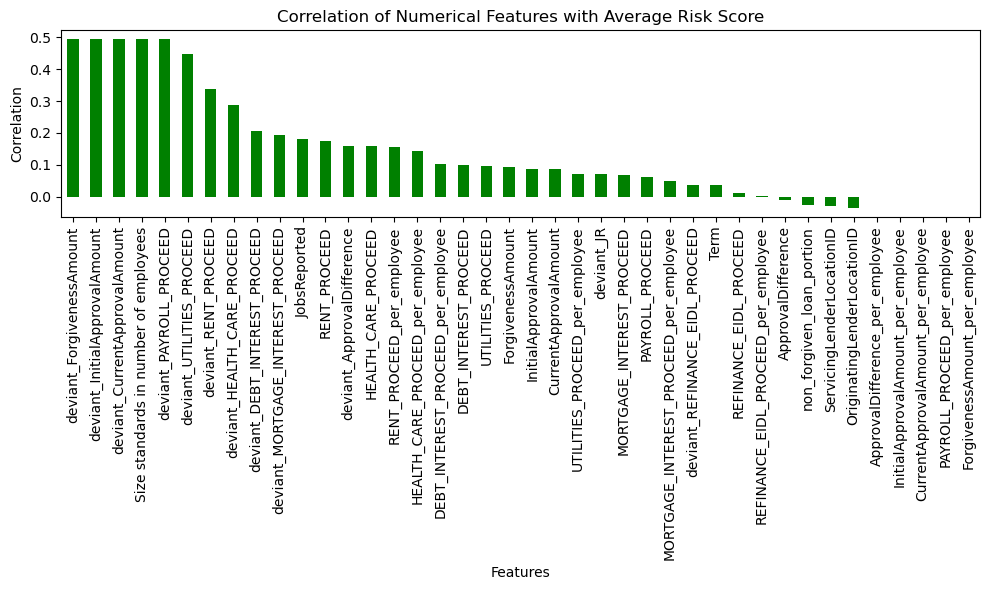

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a bar plot for the correlations
correlations.plot(kind='bar', color='green')

# Adding labels and title
plt.title('Correlation of Numerical Features with Average Risk Score')
plt.xlabel('Features')
plt.ylabel('Correlation')

# Show plot
plt.tight_layout()
plt.show()

# Save the plot as a PNG file 
plt.savefig('ppp_avr_corr.png', dpi=300, bbox_inches='tight')

In [31]:
# Calculate the threshold for the top 10% of risk scores
threshold = clean['average_risk_score'].quantile(0.9)

threshold = f"{threshold:.3f}"

print("Threshold for the top 10% of risk scores:", threshold)

Threshold for the top 10% of risk scores: 0.394


In [32]:
# Calculate the threshold for the top 10% of risk scores
threshold = clean['average_risk_score'].quantile(0.95)

threshold = f"{threshold:.3f}"

print("Threshold for the top 5% of risk scores:", threshold)

Threshold for the top 5% of risk scores: 0.442


In [33]:
# Calculate the threshold for the top 1% of risk scores
threshold = clean['average_risk_score'].quantile(0.99)

threshold = f"{threshold:.3f}"

print("Threshold for the top 1% of risk scores:", threshold)

Threshold for the top 1% of risk scores: 0.586


In [34]:
clean.isnull().sum()

LoanNumber                                      0
DateApproved                                    0
SBAOfficeCode                                   0
ProcessingMethod                                0
BorrowerName                                    0
BorrowerAddress                                 0
BorrowerCity                                    0
BorrowerState                                   0
BorrowerZip                                     0
LoanStatusDate                                  0
LoanStatus                                      0
Term                                            0
SBAGuarantyPercentage                           0
InitialApprovalAmount                           0
CurrentApprovalAmount                           0
UndisbursedAmount                               0
FranchiseName                                   0
ServicingLenderLocationID                       0
ServicingLenderName                             0
ServicingLenderAddress                          0


In [35]:
# clean.to_csv('ppp_risk.csv', index = False)